# PREPARAÇÃO DOS DADOS E EDA - DELITOS NYC

[dataset NY](https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)

## 1- Importando a base de dados

In [1]:
#  Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# lendo o arquivo csv referente aos delitos em nova york
ny  = pd.read_csv('ny.csv')

C:\Users\pc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ny.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


## 2- Preparaçao dos dados

 - Criando um novo DataFrame "select_ny"


 - Criando uma cópia do DataFrame ny

In [4]:
ny_datetime = ny.copy()

 - Convertendo algumas colunas para formato datetime

In [5]:
ny_datetime["CMPLNT_FR_DT"] = pd.to_datetime(ny_datetime["CMPLNT_FR_DT"], errors = 'coerce')

In [6]:
# ny_datetime['CMPLNT_FR_TM'] = pd.to_datetime(ny_datetime['CMPLNT_FR_TM'],format=r"%H:%M:%S.%f")

In [7]:
ny_datetime['CMPLNT_TO_DT'] = pd.to_datetime(ny_datetime['CMPLNT_TO_DT'], errors = 'coerce')

In [8]:
# ny_datetime['CMPLNT_TO_TM'] = pd.to_datetime(ny_datetime['CMPLNT_TO_TM'], errors = 'coerce')

In [9]:
ny_datetime['RPT_DT'] = pd.to_datetime(ny_datetime['RPT_DT'], errors = 'coerce')

In [10]:
ny_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   CMPLNT_NUM         1048575 non-null  int64         
 1   CMPLNT_FR_DT       1048503 non-null  datetime64[ns]
 2   CMPLNT_FR_TM       1048575 non-null  object        
 3   CMPLNT_TO_DT       842616 non-null   datetime64[ns]
 4   CMPLNT_TO_TM       843002 non-null   object        
 5   RPT_DT             1048575 non-null  datetime64[ns]
 6   KY_CD              1048575 non-null  int64         
 7   OFNS_DESC          1045695 non-null  object        
 8   PD_CD              1047842 non-null  float64       
 9   PD_DESC            1047842 non-null  object        
 10  CRM_ATPT_CPTD_CD   1048574 non-null  object        
 11  LAW_CAT_CD         1048575 non-null  object        
 12  JURIS_DESC         1048575 non-null  object        
 13  BORO_NM            1048575 

## 2.1- Selecionando colunas do DataFrame "ny_datetime"

 - Utilizamos o DataFrame "ny_datetime" , que ja tem as colunas convertidas para o padrão datetime.

 - Por meio do metodo iloc ,selecinamos as colunas que tem informações úteis, relacionadas aos delitos praticados.

 

In [11]:
select_ny = ny_datetime.iloc[:, [1,2,3,4,5,7,10,11,12,13,15,16,21,22,23]]

 -  Renomeando as colunas do DataFrame select_ny

In [12]:
select_ny.columns = ['data_da_ocorrencia','hora_da_ocorrencia','data_final_da_ocorrencia', 
                     'hora_termino_da_ocorrencia','data_comunicacao_policia',
                     'descricao_da_ofensa','conclusao','nivel_de_ofensa','jurisdicao','bairro','local_da_ocorrencia'
                    ,'descricao_das_intalacoes','latitude','longitude','lat_long']

In [13]:
select_ny.head()

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,latitude,longitude,lat_long
0,2015-12-31,23:45:00,NaT,NaN,2015-12-31,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,INSIDE,BAR/NIGHT CLUB,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,2015-12-31,23:36:00,NaT,NaN,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,OUTSIDE,NaN,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,2015-12-31,23:30:00,NaT,NaN,2015-12-31,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,2015-12-31,23:30:00,NaT,NaN,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,INSIDE,RESIDENCE-HOUSE,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,2015-12-31,23:25:00,2015-12-31,23:30:00,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,FRONT OF,OTHER,40.738002,-73.987891,"(40.7380024, -73.98789129)"


## 2.2-  Alterando dados do DataFrame "select_ny"

In [14]:
select_ny = select_ny.copy()

In [15]:
# alterando os dados de  select_ny['conclusao']
new_conclusao = {'ATTEMPTED': 'nao_concluido', 'COMPLETED': 'concluido' }
select_ny['conclusao'] = select_ny['conclusao'].map(new_conclusao)

# alterando os dados de  select_ny['nivel_de_ofensa']
new_nivel_de_ofensa = {'MISDEMEANOR': "contravencao", 'FELONY': "crime", 'VIOLATION': "violacao" }
select_ny['nivel_de_ofensa'] = select_ny['nivel_de_ofensa'].map(new_nivel_de_ofensa)


# alterando os dados de  select_ny['local_da_ocorrencia'], dentro ou fora dos estabelecimentos 
new_local_da_ocorrencia = {'INSIDE': "dentro", 'FRONT OF': "fora", 'OPPOSITE OF': "fora", 
                           'REAR OF': "fora", 'OUTSIDE': "fora" }
select_ny['local_da_ocorrencia'] = select_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

 - Reordenando as colunas do DataFrame

In [16]:
select_ny = select_ny[['data_da_ocorrencia', 'data_final_da_ocorrencia', 'data_comunicacao_policia','hora_da_ocorrencia',
                       'hora_termino_da_ocorrencia','descricao_da_ofensa',
                       'conclusao', 'nivel_de_ofensa', 'jurisdicao','bairro', 'local_da_ocorrencia', 'descricao_das_intalacoes','latitude','longitude','lat_long']]

select_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,latitude,longitude,lat_long
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,fora,OTHER,40.738002,-73.987891,"(40.7380024, -73.98789129)"


## 3.0  Gerando algumas vizualizações de select_ny 

### 3.1- Quantidade de delitos cometidos por bairros
 
 - Delitos_concluidos_por_bairros será o dataframe a ser utilizado neste tópico
 - Selecionando apenas os delitos concluídos

In [17]:
delitos_concluidos_por_bairros = select_ny.query('conclusao == "concluido"')

In [18]:
delitos_concluidos_por_bairros.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,latitude,longitude,lat_long
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,fora,OTHER,40.738002,-73.987891,"(40.7380024, -73.98789129)"


 - Criando o DataFrame delitos_concluidos_por_bairros

In [19]:
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros.bairro.value_counts()
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros_df.to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'delitos_concluidos']
delitos_concluidos_por_bairros_df

,bairro,delitos_concluidos
0,BROOKLYN,309645
1,MANHATTAN,240259
2,BRONX,223833
3,QUEENS,208015
4,STATEN ISLAND,48064


- Visualizando a quantidade de delitos em cada bairro

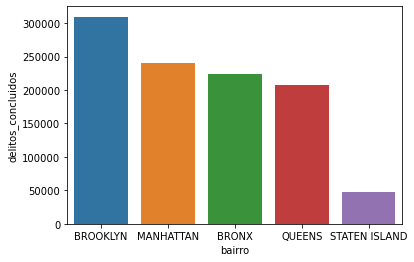

In [20]:
sns.barplot(x = 'bairro' , y = 'delitos_concluidos' , data = delitos_concluidos_por_bairros_df)

### Visualizando o comportamento dos delitos ao longo dos anos 

  - Verificando a quantidade de registros por ano

In [21]:
select_ny['data_da_ocorrencia'].dt.year.value_counts().head(10)

2014.0    490363
2015.0    468576
2013.0     86162
2012.0      1229
2011.0       578
2010.0       357
2009.0       242
2008.0       218
2006.0       139
2007.0       135
Name: data_da_ocorrencia, dtype: int64

### 3.2- Descrição da ofensa :  tipos de delitos mais comuns

In [22]:
tipos_de_delitos = delitos_concluidos_por_bairros.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

In [23]:
principais_delitos = tipos_de_delitos.head()
principais_delitos

,descricao_da_ofensa,quantidade
0,PETIT LARCENY,177689
1,HARRASSMENT 2,132854
2,ASSAULT 3 & RELATED OFFENSES,113732
3,CRIMINAL MISCHIEF & RELATED OF,102419
4,GRAND LARCENY,94360


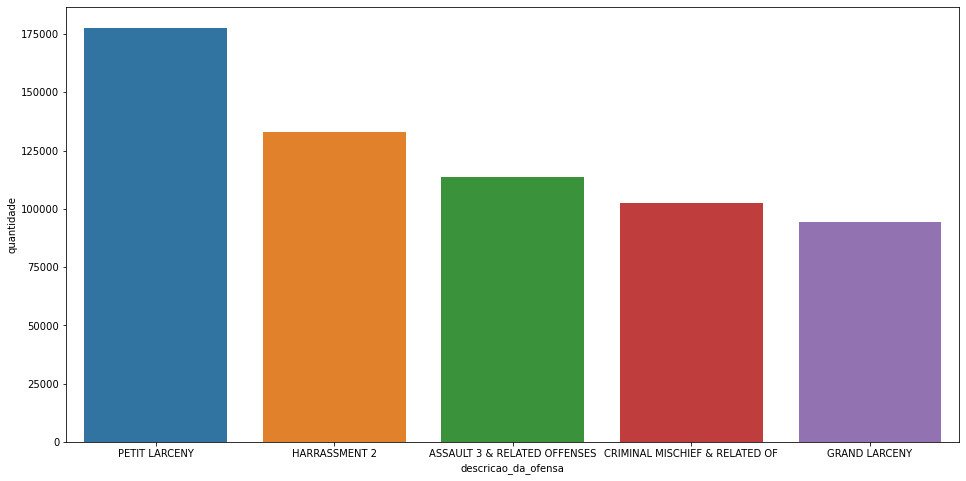

In [24]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'descricao_da_ofensa' , y = 'quantidade' , data = principais_delitos)

###  Nivel  de ofensa  dos delitos mais comuns
 

 -  Detalhando os crimes 

In [25]:
crimes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "crime"').descricao_da_ofensa.value_counts()
crimes_df = crimes_df.to_frame().reset_index()
crimes_df.columns = ['tipo_crimes','quantidade']
crimes_df.head()

,tipo_crimes,quantidade
0,GRAND LARCENY,94360
1,FELONY ASSAULT,41566
2,ROBBERY,32620
3,BURGLARY,32229
4,MISCELLANEOUS PENAL LAW,27218


 -  Detalhando as contravenções 

In [26]:
contravencoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "contravencao"').descricao_da_ofensa.value_counts()
contravencoes_df = contravencoes_df.to_frame().reset_index()
contravencoes_df.columns = ['tipo_contravencao','quantidade']
contravencoes_df.head()

,tipo_contravencao,quantidade
0,PETIT LARCENY,177689
1,ASSAULT 3 & RELATED OFFENSES,113732
2,CRIMINAL MISCHIEF & RELATED OF,83476
3,DANGEROUS DRUGS,46976
4,OFF. AGNST PUB ORD SENSBLTY &,44641


 -  Detalhando as violações

In [27]:
violacoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "violacao"').descricao_da_ofensa.value_counts()
violacoes_df = violacoes_df.to_frame().reset_index()
violacoes_df.columns = ['tipo_violacao','quantidade']
violacoes_df.head()

,tipo_violacao,quantidade
0,HARRASSMENT 2,132854
1,MISCELLANEOUS PENAL LAW,1716
2,ADMINISTRATIVE CODE,184
3,DISORDERLY CONDUCT,121
4,OTHER STATE LAWS,31


###  3.3- Relação entre o  horario e os tipos de delitos 

-  Delitos particados durante dia  

In [28]:
delitos_dia = delitos_concluidos_por_bairros.query(' hora_da_ocorrencia >= "06:00:00" and hora_da_ocorrencia < "18:00:00" ')

In [29]:
tipos_de_ofensa_dia = delitos_dia.nivel_de_ofensa.value_counts().to_frame().reset_index()
tipos_de_ofensa_dia.columns = ['ofensa' , 'quantidade']
tipos_de_ofensa_dia

,ofensa,quantidade
0,contravencao,264575
1,crime,139481
2,violacao,65930


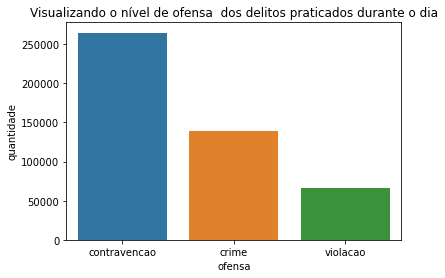

In [30]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data =tipos_de_ofensa_dia)
plt.title('Visualizando o nível de ofensa  dos delitos praticados durante o dia')
plt.show()

In [31]:
delitos_dia.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,latitude,longitude,lat_long
21,2015-04-06,2015-04-10,2015-12-21,12:00:00,18:00:00,RAPE,concluido,crime,N.Y. POLICE DEPT,QUEENS,dentro,OTHER,NaN,NaN,NaN
126,2013-06-26,2013-09-09,2015-12-14,15:00:00,7:00:00,SEX CRIMES,concluido,crime,N.Y. POLICE DEPT,BROOKLYN,dentro,RESIDENCE-HOUSE,NaN,NaN,NaN
147,2015-12-31,NaT,2015-12-31,12:35:00,NaN,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,NaN,GAS STATION,40.782291,-73.914596,"(40.782290775, -73.914596198)"
189,2015-12-31,NaT,2015-12-31,16:30:00,NaN,GRAND LARCENY,concluido,crime,N.Y. POLICE DEPT,BROOKLYN,dentro,DRY CLEANER/LAUNDRY,40.677838,-73.884875,"(40.677837858, -73.884874827)"
192,2015-12-31,2015-12-31,2015-12-31,17:57:00,18:13:00,VEHICLE AND TRAFFIC LAWS,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,NaN,STREET,40.724145,-73.992606,"(40.724144528, -73.99260554)"


### - Descrição dos delitos praticados durante o dia  em cada bairro

 - BROOKLYN

In [32]:
delitos_brooklyn_dia = delitos_dia.query(' bairro == "BROOKLYN"')

In [33]:
delitos_brooklyn_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     25926
HARRASSMENT 2                     20257
ASSAULT 3 & RELATED OFFENSES      14227
GRAND LARCENY                     13857
CRIMINAL MISCHIEF & RELATED OF    12925
Name: descricao_da_ofensa, dtype: int64

 - MANHATTAN

In [34]:
delitos_manhattan_dia = delitos_dia.query('bairro == "MANHATTAN"')

In [35]:
delitos_manhattan_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     30647
GRAND LARCENY                     17960
HARRASSMENT 2                     13212
CRIMINAL MISCHIEF & RELATED OF     8423
ASSAULT 3 & RELATED OFFENSES       8061
Name: descricao_da_ofensa, dtype: int64

  - BRONX

In [36]:
delitos_bronx_dia = delitos_dia.query('bairro == "BRONX"')

In [37]:
delitos_bronx_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     16950
HARRASSMENT 2                     13864
ASSAULT 3 & RELATED OFFENSES      11735
DANGEROUS DRUGS                    9324
CRIMINAL MISCHIEF & RELATED OF     8541
Name: descricao_da_ofensa, dtype: int64

 - QUEENS

In [38]:
delitos_queens_dia = delitos_dia.query('bairro == "QUEENS"')

In [39]:
delitos_queens_dia.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     18013
HARRASSMENT 2                     13148
CRIMINAL MISCHIEF & RELATED OF     9232
GRAND LARCENY                      9174
ASSAULT 3 & RELATED OFFENSES       8614
Name: descricao_da_ofensa, dtype: int64

 - STATEN ISLAND

In [40]:
delitos_statenisland_dia = delitos_dia.query('bairro == "STATEN ISLAND"')

In [41]:
delitos_statenisland_dia.descricao_da_ofensa.value_counts().head()

HARRASSMENT 2                     4592
PETIT LARCENY                     4229
CRIMINAL MISCHIEF & RELATED OF    2565
ASSAULT 3 & RELATED OFFENSES      2060
OFF. AGNST PUB ORD SENSBLTY &     1625
Name: descricao_da_ofensa, dtype: int64

###  Delitos particados durante a noite 

In [42]:
delitos_noite = delitos_concluidos_por_bairros.query(' hora_da_ocorrencia >= "18:00:00" and hora_da_ocorrencia < "6:00:00" ')

In [43]:
delitos_noite.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,latitude,longitude,lat_long
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,fora,OTHER,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [44]:
tipos_de_ofensa_noite = delitos_noite.nivel_de_ofensa.value_counts().to_frame().reset_index()
tipos_de_ofensa_noite.columns = ['ofensa' , 'quantidade']
tipos_de_ofensa_noite

,ofensa,quantidade
0,contravencao,260234
1,crime,138405
2,violacao,51602


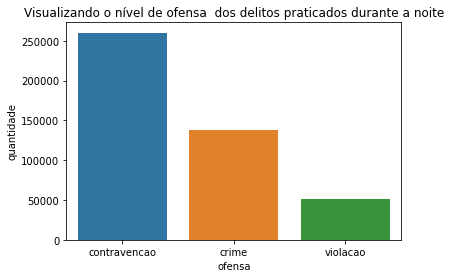

In [45]:
sns.barplot(x = 'ofensa' , y = 'quantidade' ,data =  tipos_de_ofensa_noite)
plt.title('Visualizando o nível de ofensa  dos delitos praticados durante a noite')
plt.show()

####  - Descrição dos delitos praticados a noite em cada bairro

 - BROOKLYN

In [46]:
delitos_brooklyn_noite = delitos_noite.query(' bairro == "BROOKLYN"')

In [47]:
delitos_brooklyn_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     18485
ASSAULT 3 & RELATED OFFENSES      17726
HARRASSMENT 2                     15972
CRIMINAL MISCHIEF & RELATED OF    15053
DANGEROUS DRUGS                    9148
Name: descricao_da_ofensa, dtype: int64

 - MANHATTAN

In [48]:
delitos_manhattan_noite = delitos_noite.query(' bairro == "MANHATTAN"')

In [49]:
delitos_manhattan_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     18505
GRAND LARCENY                     12946
ASSAULT 3 & RELATED OFFENSES      11293
HARRASSMENT 2                      9665
CRIMINAL MISCHIEF & RELATED OF     9275
Name: descricao_da_ofensa, dtype: int64

 - BRONX

In [50]:
delitos_bronx_noite = delitos_noite.query(' bairro == "BRONX"')

In [51]:
delitos_bronx_noite.descricao_da_ofensa.value_counts().head()

ASSAULT 3 & RELATED OFFENSES      14220
PETIT LARCENY                     11966
DANGEROUS DRUGS                   11273
CRIMINAL MISCHIEF & RELATED OF    10549
HARRASSMENT 2                     10294
Name: descricao_da_ofensa, dtype: int64

 - QUEENS

In [52]:
delitos_queens_noite = delitos_noite.query(' bairro == "QUEENS"')

In [53]:
delitos_queens_noite.descricao_da_ofensa.value_counts().head()

PETIT LARCENY                     13257
ASSAULT 3 & RELATED OFFENSES      12532
CRIMINAL MISCHIEF & RELATED OF    11379
HARRASSMENT 2                     10950
GRAND LARCENY                      6263
Name: descricao_da_ofensa, dtype: int64

 - STATEN ISLAND

In [54]:
delitos_statenisland_noite = delitos_noite.query(' bairro == "STATEN ISLAND"')

In [55]:
delitos_statenisland_noite.descricao_da_ofensa.value_counts().head()

HARRASSMENT 2                     3678
CRIMINAL MISCHIEF & RELATED OF    2857
PETIT LARCENY                     2717
ASSAULT 3 & RELATED OFFENSES      2328
OFF. AGNST PUB ORD SENSBLTY &     1113
Name: descricao_da_ofensa, dtype: int64

# Tratando os dados e excluindo valores nulos

In [57]:
select_ny = select_ny.dropna()

In [58]:
select_ny.shape

(653539, 15)

In [59]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653539 entries, 4 to 1048573
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   data_da_ocorrencia          653539 non-null  datetime64[ns]
 1   data_final_da_ocorrencia    653539 non-null  datetime64[ns]
 2   data_comunicacao_policia    653539 non-null  datetime64[ns]
 3   hora_da_ocorrencia          653539 non-null  object        
 4   hora_termino_da_ocorrencia  653539 non-null  object        
 5   descricao_da_ofensa         653539 non-null  object        
 6   conclusao                   653539 non-null  object        
 7   nivel_de_ofensa             653539 non-null  object        
 8   jurisdicao                  653539 non-null  object        
 9   bairro                      653539 non-null  object        
 10  local_da_ocorrencia         653539 non-null  object        
 11  descricao_das_intalacoes    653539 non

 -  Selecionando datas acima de 2013

In [60]:
select_ny = select_ny.query('data_da_ocorrencia >= "2013-1-1"')

In [61]:
select_ny['data_da_ocorrencia'].dt.year.value_counts()

2014    302720
2015    295290
2013     53803
Name: data_da_ocorrencia, dtype: int64

In [62]:
select_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,latitude,longitude,lat_long
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,fora,OTHER,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,2015-12-31,2015-12-31,2015-12-31,23:18:00,23:25:00,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,fora,DRUG STORE,40.665023,-73.957111,"(40.665022689, -73.957110763)"
7,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:15:00,DANGEROUS WEAPONS,concluido,crime,N.Y. POLICE DEPT,BRONX,fora,STREET,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:30:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,2015-12-31,2015-12-31,2015-12-31,23:10:00,23:10:00,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,DRUG STORE,40.765618,-73.963623,"(40.765617688, -73.96362342)"


- Criando um arquivo csv "select_ny"

In [ ]:
# select_ny.to_csv('select_ny.csv', index =False , encoding = 'latin-1' )

In [ ]:
# pd.read_csv('select_ny.csv')